In [ ]:
import os
import pandas as pd
import numpy as np
import math
import tensorflow as tf

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the file
path = "/content/drive/My Drive/Colab Notebooks/meta/netflix_titles.csv"
original_df = pd.read_csv(path)
len(original_df)

8807

In [ ]:
#First five rows
new_df = original_df.head(5)
new_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Drop "title" and "description" columns
original_df.drop(columns = ['title', 'description'])

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
##Change Null to "True" or Averag
original_df.director.fillna("No Director", inplace = True)
original_df.cast.fillna("No Cast", inplace = True)
original_df.country.fillna("Country Unavailable", inplace = True)
original_df.dropna(subset = ["date_added", "rating", "duration"], inplace = True)

#check if Columns with missing Value
print(original_df.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


### Duration to Numeric

In [ ]:
# convert duration columns to numeric
duration_list = list()
str_dur_list = []
dur_list = original_df['duration'].to_list()

for i in range(0, len(dur_list)):
  y = dur_list[i].split()[0]
  str_dur_list.append(y)
  dur_list[i] = int(str_dur_list[i])
#create new column "new_dur" with numeric duration
original_df['new_dur'] = dur_list

In [ ]:
dur_list
movies_dur = []
show_dur = []
#Grouping Series Vs Movies duration
for i in dur_list:
  if i<25:
    show_dur.append(i)
  else:
    movies_dur.append(i)

In [ ]:
from collections import Counter
show_counter = Counter( show_dur )
movies_counter = Counter(movies_dur)
duration_counter = Counter(dur_list)
print( show_counter.items())
print( movies_counter.items())
print(duration_counter.items())

dict_items([(2, 421), (1, 1791), (9, 10), (4, 94), (5, 65), (3, 199), (23, 13), (6, 33), (13, 5), (7, 23), (10, 7), (8, 18), (17, 4), (12, 5), (15, 5), (21, 3), (24, 23), (22, 16), (14, 3), (20, 2), (16, 1), (11, 3), (19, 2), (18, 1)])
dict_items([(90, 152), (91, 144), (125, 36), (104, 104), (127, 48), (67, 21), (94, 146), (161, 10), (61, 31), (166, 8), (147, 12), (103, 114), (97, 146), (106, 111), (111, 68), (110, 97), (105, 101), (96, 130), (124, 52), (116, 80), (98, 120), (115, 60), (122, 45), (99, 118), (88, 116), (100, 108), (102, 122), (93, 146), (95, 137), (85, 73), (83, 65), (113, 69), (182, 3), (48, 8), (145, 18), (87, 101), (92, 129), (80, 43), (117, 61), (128, 41), (119, 63), (143, 23), (114, 56), (118, 65), (108, 87), (63, 32), (121, 54), (142, 13), (154, 13), (120, 56), (82, 52), (109, 69), (101, 116), (86, 103), (229, 1), (76, 31), (89, 106), (156, 10), (112, 74), (107, 98), (129, 32), (135, 39), (136, 23), (165, 8), (150, 17), (133, 42), (70, 28), (84, 67), (140, 25), (7

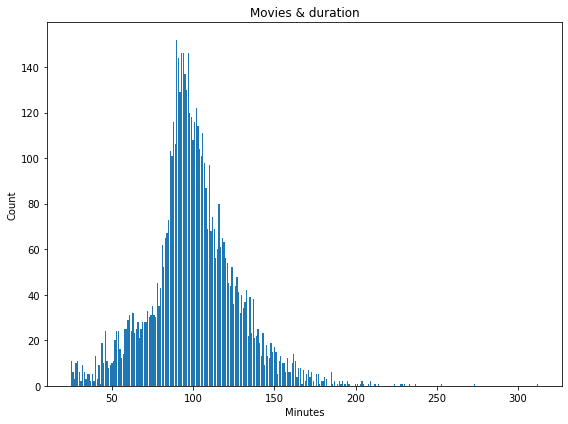

In [ ]:
from numpy.lib.function_base import place
import collections
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

#Plot Movies & Duration
plt.bar(movies_counter.keys(), movies_counter.values())
plt.title('Movies & duration')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

## Shows & Duration

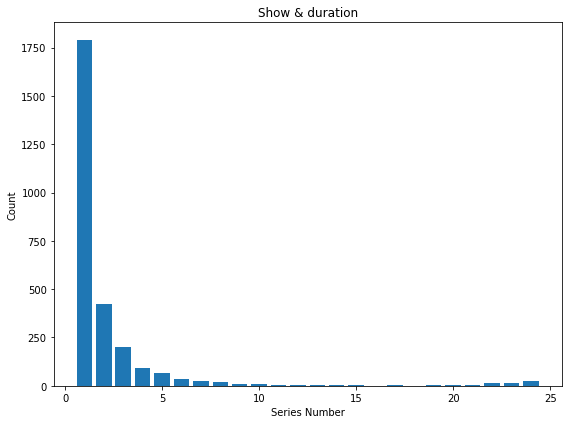

In [ ]:
#Plot Show & Duration
plt.bar(show_counter.keys(), show_counter.values())
plt.title('Show & duration')
plt.xlabel('Series Number')
plt.ylabel('Count')
plt.show()

##Type

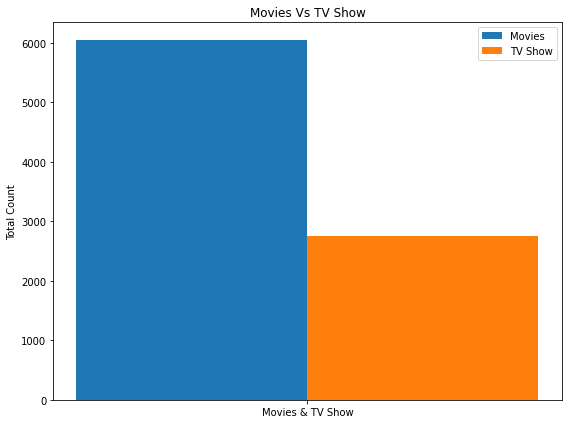

In [ ]:
#Plot Movies & Show Quantity
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Movies & TV Show']
Ymovies = len(movies_dur)
Zshows = len(show_dur)
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymovies, 0.4, label = 'Movies')
plt.bar(X_axis + 0.2, Zshows, 0.4, label = 'TV Show')
  
plt.xticks(X_axis, X)
#plt.xlabel("Groups")
plt.ylabel("Total Count")
plt.title("Movies Vs TV Show")
plt.legend()
plt.show()

In [ ]:
#convert 'date_added' column to year
date_added = list()
date_added_list = []
year_list = original_df['date_added'].to_list()

for i in range(0, len(year_list)):
  y = year_list[i].split()[2]
  date_added_list.append(y)
  date_added.append(int(date_added_list[i]))

#create a new column "year_added" 
original_df['year_added'] = date_added

In [ ]:
#drop 'title', 'description', 'date_added'
original_df = original_df.drop(columns = ['title', 'description', 'date_added'])

In [ ]:
#create a new colum for year difference (release vs added)
year_ad_list = original_df['year_added'].to_list()
year_rel_list = original_df['release_year'].to_list()
diff_year = []

for i in range(0, len(year_ad_list)):
  diff = year_ad_list[i]- year_rel_list[i]
  diff_year.append(diff)

original_df['Diff_added_rel'] = diff_year

## Find top 15 Director 

In [ ]:
director_list = original_df['director'].to_list()
temp_list= []

for i in director_list:
  if (i != 'No Director'):
    size = len(i.split(','))
    if (size == 1):
      temp_list.append(i)
    else:
      for x in range(0, size):
        temp_list.append(i.split(',')[x])

#temp_list
from collections import Counter
dir_counter = Counter(temp_list )
print( dir_counter.items())

dir_tuple = [(k, v) for k, v in dir_counter.items()]

#sorting tuple
def Sort_Tuple(tup): 
    # getting length of list of tuples
    lst = len(tup) 
    for i in range(0, lst): 
        for j in range(0, lst-i-1): 
            if (tup[j][1] < tup[j + 1][1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 

#print(Sort_Tuple(dir_tuple)) 
sorted_dir_tup = Sort_Tuple(dir_tuple)

dir_names = []
dir_count = []
for i in range(0, len(sorted_dir_tup)):
  dir_names.append(sorted_dir_tup[i][0])
  dir_count.append(sorted_dir_tup[i][1])

ser1 = pd.Series(dir_names)
ser2 = pd.Series(dir_count)

dir_df = pd.concat([ser1, ser2], axis = 1)
# Rename Columns
dir_df.columns = ['Directors', 'Counts']

In [ ]:
print(dir_df)

                    Directors  Counts
0               Rajiv Chilaka      22
1                 Raúl Campos      18
2                   Jan Suter      18
3                 Suhas Kadav      16
4                Marcus Raboy      16
...                       ...     ...
5113                   Mu Chu       1
5114  Chandra Prakash Dwivedi       1
5115          Majid Al Ansari       1
5116             Peter Hewitt       1
5117              Mozez Singh       1

[5118 rows x 2 columns]


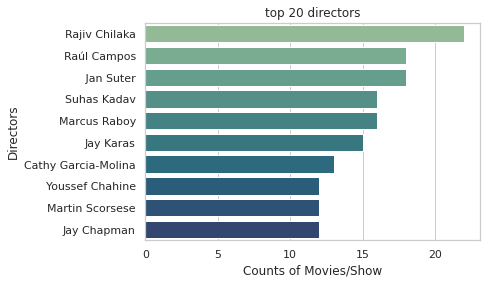

In [ ]:
#print top 10 movie directors
top10_dir = dir_df[:10]
ax = sns.barplot(y="Directors", x="Counts", data=top10_dir, palette = "crest")
plt.title("top 20 directors")
plt.xlabel("Counts of Movies/Show")
plt.ylabel("Directors")
plt.show()

##Top Actors

In [ ]:
actor_list = original_df['cast'].to_list()
temp_list= []

#splitting cast list 
for i in actor_list:
  if (i != 'No Genre'):
    size = len(i.split(','))
    if (size == 1):
      temp_list.append(i)
    else:
      for x in range(0, size):
        temp_list.append(i.split(',')[x])

#Counting actor's frequency 
from collections import Counter
genre_counter = Counter(temp_list )
print( genre_counter.items())

genre_tuple = [(k, v) for k, v in genre_counter.items()]

#sorting tuple
def Sort_Tuple(tup): 
    # getting length of list of tuples
    lst = len(tup) 
    for i in range(0, lst): 
        for j in range(0, lst-i-1): 
            if (tup[j][1] < tup[j + 1][1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 

#print(Sort_Tuple(dir_tuple)) 
sorted_genre_tup = Sort_Tuple(genre_tuple)

genre = []
genre_count = []
for i in range(0, len(sorted_genre_tup)):
  genre.append(sorted_genre_tup[i][0])
  genre_count.append(sorted_genre_tup[i][1])

ser3 = pd.Series(genre)
ser4 = pd.Series(genre_count)

genre_df = pd.concat([ser3, ser4], axis = 1)
# Rename Columns
genre_df.columns = ['Genre', 'Counts']

In [ ]:
print(genre_df)

                        Genre  Counts
0                     No Cast     825
1                 Anupam Kher      39
2                Rupa Bhimani      31
3            Takahiro Sakurai      30
4               Julie Tejwani      28
...                       ...     ...
39244             Ryan Newman       1
39245         Raaghav Chanana       1
39246           Malkeet Rauni       1
39247          Anita Shabdish       1
39248   Chittaranjan Tripathy       1

[39249 rows x 2 columns]


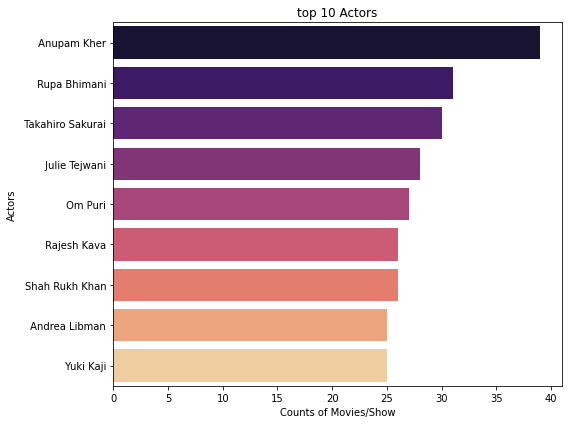

In [ ]:
#graph top 10 actors
top_actors = genre_df[1:10]
ax = sns.barplot(y="Genre", x="Counts", data=top_actors, palette = 'magma')
plt.title("top 10 Actors")
plt.xlabel("Counts of Movies/Show")
plt.ylabel("Actors")
plt.show()

## Top Genre

In [ ]:
genre_list = original_df['listed_in'].to_list()
temp_list= []

#directors_new = director_list
for i in genre_list:
  if (i != 'No Cast'):
    size = len(i.split(','))
    if (size == 1):
      temp_list.append(i)
    else:
      for x in range(0, size):
        temp_list.append(i.split(',')[x])
#temp_list
from collections import Counter
actor_counter = Counter(temp_list )
print( actor_counter.items())

actor_tuple = [(k, v) for k, v in actor_counter.items()]

#sorting tuple
def Sort_Tuple(tup): 
    # getting length of list of tuples
    lst = len(tup) 
    for i in range(0, lst): 
        for j in range(0, lst-i-1): 
            if (tup[j][1] < tup[j + 1][1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 

#print(Sort_Tuple(dir_tuple)) 
sorted_actor_tup = Sort_Tuple(actor_tuple)

actor_names = []
actor_count = []
for i in range(0, len(sorted_actor_tup)):
  actor_names.append(sorted_actor_tup[i][0])
  actor_count.append(sorted_actor_tup[i][1])


ser3 = pd.Series(actor_names)
ser4 = pd.Series(actor_count)

actor_df = pd.concat([ser3, ser4], axis = 1)
# Rename Columns
actor_df.columns = ['Cast', 'Counts']

In [ ]:
print(actor_df)

                         Cast  Counts
0        International Movies    2624
1                      Dramas    1599
2                    Comedies    1210
3          Action & Adventure     859
4               Documentaries     829
..                        ...     ...
68            Romantic Movies       3
69  Spanish-Language TV Shows       2
70               LGBTQ Movies       1
71        TV Sci-Fi & Fantasy       1
72              Sports Movies       1

[73 rows x 2 columns]


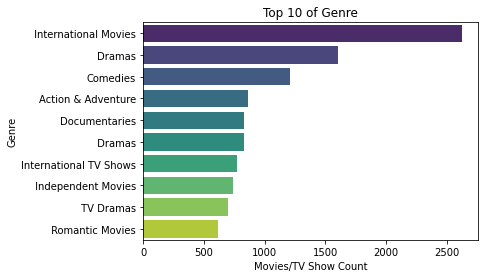

In [ ]:
#print top 10 Genre
import seaborn as sns
import matplotlib.pyplot as plt
top_genre = actor_df[:10]
ax = sns.barplot(y="Cast", x="Counts", data=top_genre, palette = "viridis")
plt.title("Top 10 of Genre")
plt.xlabel("Movies/TV Show Count")
plt.ylabel("Genre")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
original_df.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'new_dur', 'year_added',
       'Diff_added_rel'],
      dtype='object')

## Country

In [ ]:
county_list = original_df['country'].to_list()

In [ ]:
temp_list= []

In [ ]:
#directors_new = director_list
for i in county_list:
  if (i != 'Country Unavailable'):
    size = len(i.split(','))
    if (size == 1):
      temp_list.append(i)
    else:
      for x in range(0, size):
        temp_list.append(i.split(',')[x])

In [ ]:
#temp_list
from collections import Counter
county_counter = Counter(temp_list )
print( county_counter.items())

dict_items([('United States', 6404), ('South Africa', 82), ('India', 2016), (' Ghana', 2), (' Burkina Faso', 2), (' United Kingdom', 356), (' Germany', 246), (' Ethiopia', 2), ('United Kingdom', 1254), ('Germany', 206), (' Czech Republic', 32), ('Mexico', 268), ('Turkey', 222), ('Australia', 230), (' India', 76), (' France', 362), ('Finland', 12), ('China', 200), (' Canada', 348), (' United States', 958), (' Japan', 118), ('Nigeria', 192), ('Japan', 514), ('Spain', 362), ('France', 424), ('Belgium', 36), ('South Korea', 422), (' Singapore', 26), (' Australia', 86), (' Mexico', 70), (' Italy', 66), (' Romania', 8), ('Argentina', 152), (' Venezuela', 4), (' Hong Kong', 52), ('Russia', 38), ('Canada', 542), ('Hong Kong', 158), (' China', 124), ('Italy', 132), ('', 14), (' South Korea', 40), ('Ireland', 56), (' Nepal', 4), ('New Zealand', 34), (' Brazil', 26), (' Greece', 20), ('Jordan', 4), ('Colombia', 80), ('Switzerland', 16), ('Israel', 44), ('Brazil', 168), (' Spain', 102), ('Taiwan',

In [ ]:
county_counter.keys()

dict_keys(['United States', 'South Africa', 'India', ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia', 'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey', 'Australia', ' India', ' France', 'Finland', 'China', ' Canada', ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico', ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong', 'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '', ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil', ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil', ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland', ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium', 'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden', 'Lebanon', 'Romania', ' Syria', 'Philippines', 'Iceland', 'Denmark', ' Indonesia', ' United Arab Emirates',

In [ ]:
county_tuple = [(k, v) for k, v in county_counter.items()]
# Printing list of tuple
print(list)

<class 'list'>


In [ ]:
#sorting tuple
def Sort_Tuple(tup): 
    # getting length of list of tuples
    lst = len(tup) 
    for i in range(0, lst): 
        for j in range(0, lst-i-1): 
            if (tup[j][1] < tup[j + 1][1]): 
                temp = tup[j] 
                tup[j]= tup[j + 1] 
                tup[j + 1]= temp 
    return tup 

In [ ]:
#print(Sort_Tuple(dir_tuple)) 
sorted_county_tup = Sort_Tuple(county_tuple)

In [ ]:
county = []
county_count = []
for i in range(0, len(sorted_county_tup)):
  county.append(sorted_county_tup[i][0])
  county_count.append(sorted_county_tup[i][1])

In [ ]:
ser3 = pd.Series(county)
ser4 = pd.Series(county_count)

In [ ]:
country_df = pd.concat([ser3, ser4], axis = 1)
# Rename Columns
country_df.columns = ['Country', 'Counts']

In [ ]:
print(country_df)

            Country  Counts
0     United States    6404
1             India    2016
2    United Kingdom    1254
3     United States     958
4            Canada     542
..              ...     ...
192          Panama       2
193         Namibia       2
194          Uganda       2
195    East Germany       2
196      Montenegro       2

[197 rows x 2 columns]


In [ ]:
country_df['Counts'].sum()

20008

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
top_country = country_df[:14]

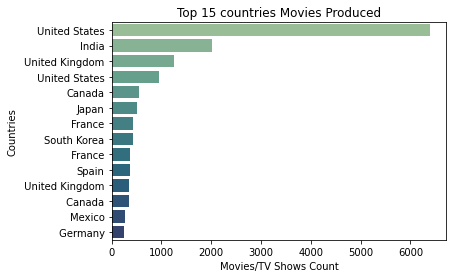

In [ ]:
ax = sns.barplot(y="Country", x="Counts", data=top_country, palette = "crest")
plt.title("Top 15 countries Movies Produced")
plt.xlabel("Movies/TV Shows Count")
plt.ylabel("Countries")
plt.show()

In [ ]:
original_df['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8790, dtype: int64

## Rating & Types

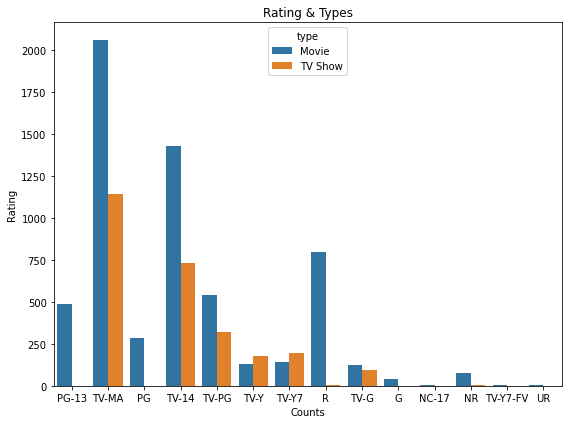

In [ ]:
ax = sns.countplot(x="rating", hue="type", data=original_df)
plt.title("Rating & Types")
plt.xlabel("Counts")
plt.ylabel("Rating")
plt.show()

## Release Year & Added Year & Types

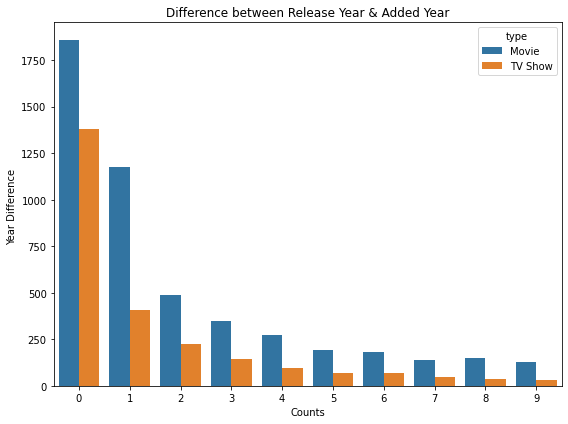

In [ ]:
ax = sns.countplot(x="Diff_added_rel", hue="type", data=original_df,
              order=original_df.Diff_added_rel.value_counts().iloc[:10].index)

plt.title("Difference between Release Year & Added Year")
plt.xlabel("Counts")
plt.ylabel("Year Difference ")
plt.show()

## Release Year & Types

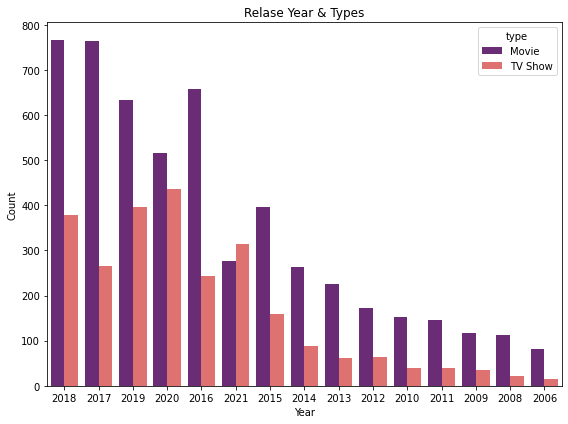

In [ ]:
ax = sns.countplot(x="release_year", hue="type", data=original_df,palette = 'magma',
              order=original_df.release_year.value_counts().iloc[:15].index)

plt.title("Relase Year & Types")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
original_df.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'new_dur', 'year_added',
       'Diff_added_rel'],
      dtype='object')

In [ ]:
year_df = original_df.drop(columns = ['show_id', 'director', 'cast', 'country',
       'rating', 'duration', 'listed_in', 'new_dur', 'year_added',
       'Diff_added_rel'])

In [ ]:
year_df

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


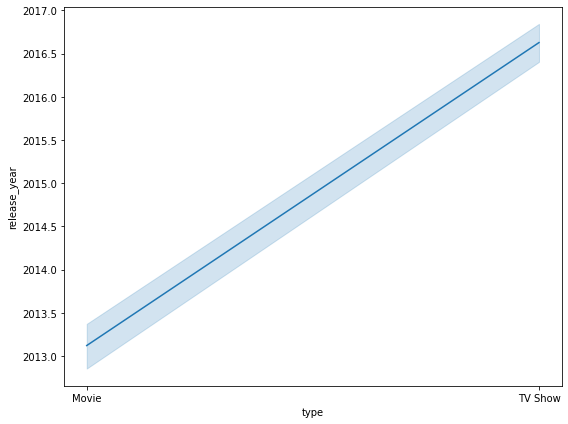

In [ ]:
import matplotlib.pyplot as plt

data_viz = df.groupby(['release_year','type'], as_index=False)['no_of_purchases'].sum()

for i in list(data_viz['transaction_type'].unique()):
    viz = sns.lineplot(data=data_viz[data_viz['transaction_type'] == i], x='year', y='no_of_purchases', hue='tier')
    plt.title(i)
    plt.show()

In [ ]:
new_df = original_df.sort_values(by=['type'])

In [ ]:
movies_df = new_df.iloc[:6125]
tv_show_df = new_df.iloc[6126:]

In [ ]:
age_list = movies_df['new_dur']

In [ ]:
print(movies_df.isnull().any())

show_id           False
type              False
director          False
cast              False
country           False
release_year      False
rating            False
duration          False
listed_in         False
new_dur           False
year_added        False
Diff_added_rel    False
dtype: bool


In [ ]:
print(age_list)

0        90
5641     84
5639     74
5638    109
5637    104
       ... 
2695    103
3302    116
3290    100
3443    101
2697     91
Name: new_dur, Length: 6125, dtype: int64


In [ ]:
#age_list = [1,27,60,200]
temp = []

In [ ]:
for i in age_list:
  if(i >= 30 and i<60):
    temp.append('0.5-1')
  elif(i>=60 and i<90):
    temp.append('1-1.5')
  elif(i>=90 and i<120):
    temp.append('1.5-2')
  elif(i>=120 and i<150):
    temp.append('2-2.5')
  elif(i>=150 and i<180):
    temp.append('2.5-3')
  elif(i>=180 and i<210):
    temp.append('3-3.5')
  elif(i>=210 and i<240):
    temp.append('3.5-4')
  elif(i>=240 and i<270):
    temp.append('4-4.5')
  elif(i>=270 and i<1000):
    temp.append('4.5-5.5')

  else:
    temp.append('0-0.5')


In [ ]:
movies_df['new_dur2']= temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
movies_df

,show_id,type,director,cast,country,release_year,rating,duration,listed_in,new_dur,year_added,Diff_added_rel,new_dur2
0,s1,Movie,Kirsten Johnson,No Cast,United States,2020,PG-13,90 min,Documentaries,90,2021,1,1.5-2
5641,s5642,Movie,Babak Anvari,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...","United Kingdom, Jordan, Qatar, Iran",2016,PG-13,84 min,"Horror Movies, International Movies, Thrillers",84,2017,1,1-1.5
5639,s5640,Movie,Jeannie Gaffigan,Jim Gaffigan,United States,2017,TV-14,74 min,Stand-Up Comedy,74,2017,0,1-1.5
5638,s5639,Movie,Mir-Jean Bou Chaaya,"Alain Saadeh, Fouad Yammine, Tarek Yaacoub, Al...","Lebanon, Qatar",2015,TV-MA,109 min,"Comedies, Dramas, International Movies",109,2017,2,1.5-2
5637,s5638,Movie,Alistair Legrand,"Vinessa Shaw, Kevin Rahm, William Atherton, Aa...",United States,2017,TV-MA,104 min,"Horror Movies, Thrillers",104,2017,0,1.5-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,s2696,Movie,Jay Karas,"Seth Carr, Tichina Arnold, Adam Pally, Ken Mar...",United States,2020,TV-G,103 min,"Children & Family Movies, Comedies, Sports Movies",103,2020,0,1.5-2
3302,s3303,Movie,Zhang Yimou,"Deng Chao, Sun Li, Ryan Cheng, Wang Qianyuan, ...","China, Hong Kong",2018,TV-14,116 min,"Action & Adventure, Dramas, International Movies",116,2019,1,1.5-2
3290,s3291,Movie,Tom Ford,"Colin Firth, Julianne Moore, Nicholas Hoult, G...",United States,2009,R,100 min,"Dramas, Independent Movies, LGBTQ Movies",100,2019,10,1.5-2
3443,s3444,Movie,Andibachtiar Yusuf,"Gading Marten, Della Dartyan, Rukman Rosadi, A...",Indonesia,2018,TV-14,101 min,"Dramas, International Movies, Romantic Movies",101,2019,1,1.5-2


## Movies Duration & Rating 

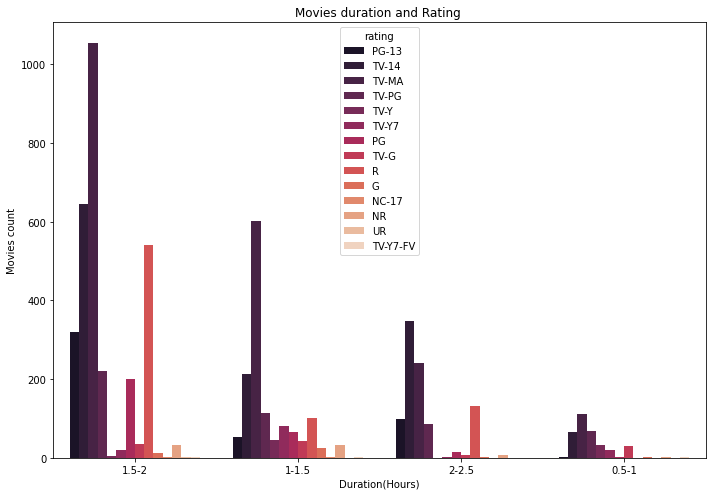

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x="new_dur2", hue="rating", data=movies_df, palette = 'rocket', order=movies_df.new_dur2.value_counts().iloc[:4].index)
plt.title("Movies duration and Rating ")
plt.xlabel("Duration(Hours)")
plt.ylabel("Movies count")

plt.show()

In [ ]:
, order=movies_df.new_dur.value_counts().iloc[:5].index

## TV Show Duration & Rating 

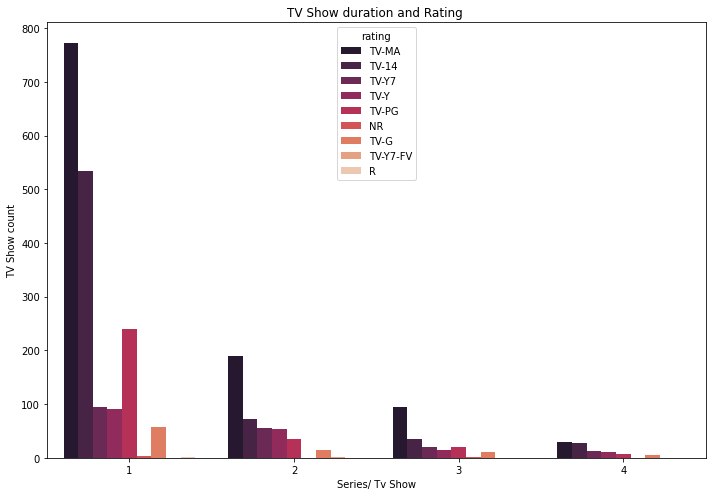

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x="new_dur", hue="rating", data=tv_show_df, palette = 'rocket',
              order=tv_show_df.new_dur.value_counts().iloc[:4].index)
plt.title("TV Show duration and Rating ")
plt.xlabel("Series/ Tv Show")
plt.ylabel("TV Show count")
#plt.figure(figsize = (11, 8))
plt.show()

## Dataset 2: Countries 

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/meta/dataset2.csv"

In [ ]:
df = pd.read_excel(path)


In [ ]:
df

,Continent,Country,Total Titles Available on Netflix,Total Films,Total TV Shows,Avg. IMDb Audience Ranking,Titles with IMDB Score >8,Avg. Metacritic Critics Score,Number of Academy Award-winners,Emmy Award-winners
0,Europe,Albania,2242,1519,723,7.099133,0.27,64.128895,55,31
1,South America,Argentina,3034,2394,640,7.039936,0.25,63.514815,69,29
2,Australasia,Australia,5349,3615,1734,7.024310,0.24,62.205584,54,23
3,Europe,Austria,3878,2690,1188,7.025687,0.24,63.121827,63,32
4,Europe,Azerbaijan,2117,1390,727,7.134567,0.28,65.270764,48,31
...,...,...,...,...,...,...,...,...,...,...
65,Europe,Ukraine,4640,3147,1493,7.129018,0.28,65.264368,48,31
66,Europe,United Kingdom,5673,3831,1842,6.972847,0.24,61.675195,59,31
67,North America,United States,5879,4035,1844,6.950882,0.23,62.906868,60,32
68,South America,Uruguay,4215,2972,1243,7.050699,0.25,63.952830,58,29


In [ ]:
df.columns

Index(['Continent', 'Country', 'Total Titles Available on Netflix',
       'Total Films', 'Total TV Shows', 'Avg. IMDb Audience Ranking',
       'Titles with IMDB Score >8', 'Avg. Metacritic Critics Score',
       'Number of Academy Award-winners', 'Emmy Award-winners'],
      dtype='object')

In [ ]:
new_df = df.drop(columns = ['Continent','Avg. IMDb Audience Ranking',
       'Titles with IMDB Score >8', 'Avg. Metacritic Critics Score',
       'Number of Academy Award-winners', 'Emmy Award-winners'])

In [ ]:
new_df

,Country,Total Titles Available on Netflix,Total Films,Total TV Shows
0,Albania,2242,1519,723
1,Argentina,3034,2394,640
2,Australia,5349,3615,1734
3,Austria,3878,2690,1188
4,Azerbaijan,2117,1390,727
...,...,...,...,...
65,Ukraine,4640,3147,1493
66,United Kingdom,5673,3831,1842
67,United States,5879,4035,1844
68,Uruguay,4215,2972,1243


In [ ]:
sorted_df = new_df.sort_values(by=['Total Titles Available on Netflix'], ascending=False)

In [ ]:
sorted_df

,Country,Total Titles Available on Netflix,Total Films,Total TV Shows
67,United States,5879,4035,1844
10,Canada,5730,4043,1687
66,United Kingdom,5673,3831,1842
29,India,5591,3781,1810
2,Australia,5349,3615,1734
...,...,...,...,...
45,Panama,2234,1535,699
5,Bahamas,2234,1535,699
41,Moldova,2145,1414,731
4,Azerbaijan,2117,1390,727


In [ ]:
new = sorted_df[0:10]

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Count (Movies & TV Show)')

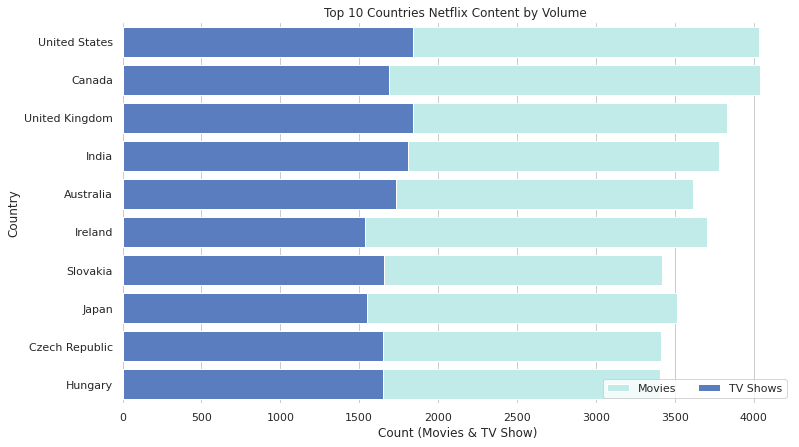

In [ ]:


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 7))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="Country", x="Total Films", data=new,
            label="Movies", color="c")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="Country", x="Total TV Shows", data=new,
            label="TV Shows", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)
ax = plt.title("Top 10 Countries Netflix Content by Volume ")
plt.xlabel("Count (Movies & TV Show)")